#  Nicolson-Ross-Weir (NRW) Program
### (Source: NIST - Transmission/Reflection and Short-Circuit Line Permittivity Measurements - 1990 )

* Through parameters S11 and S21 measured in the Vectorial Network Analyzer (VNA) was possible calculated the real and imaginary part of permitivity and permeability of teflon with 5mm thickness using the NRW by <font color = green>
Isotropic/Homogeneous Materials</font>


### This program calculates:

* Linear module of Reflection Loss (RL)
* dB module of RL
* Phase
* Absorbance, Transmitance, Reflectance
* Transmission Coefficient
* Reflection Coefficient
* Permitivity ($\epsilon $)
* Permeability ($\mu$)
* Reflectivity (S11) - Metal plate backed



In [1]:
from __future__ import division
import os 
import numpy as np
import matplotlib.pyplot as plt

#-----------------Change Directory-------------------
#Store folder location
local = os.getcwd()
#s11 and s21 Experimental Folder: dados_exp
os.chdir('./input_data')

#-----------------Graphic Size------------------
#Plot size
x = 7
y = 7
#x and y axis size
fonte = 15

#skip point
skip_point = 30


# Program Flowchart
<img src = "img/flux_vna.png" style="max-width:100%; width: 80%;">

In [2]:
#--------------Read the file-------------
TXT = []

n = 0

for arquivo in os.listdir('.'):
    if arquivo[len(arquivo)-4:] == '.txt':
        TXT.append(arquivo)

arq = open(TXT[n], 'r')
ler = arq.readlines()
arq.close()


# Reference Plan

<img src = "img/nrw_linha.jpg" style="max-width:100%; width: 40%;">


* L1 = Referência da porta 1
* L = d = espessura da amostra
* L2 = Referência da porta 2
* offset ($\frac{\lambda}{4}$) = 9.76mm

#### Example: When touching 5mm against door 1, there will be 5mm left in L2, because the offset (1/4 lambda) is almost 10mm.

In [3]:
# ------------------Guide Parameters-------------
d = 5.0e-3 #[m] thickness sample
a = 22.86e-3 #[m] larger waveguide base (X-Band)
offset = 9.76e-3 #1/4 lambda thickness


L1 = 0.0e-3 #[m] Reference plan door 1
L2 = offset - d #[m] Reference plan door 2



#properties:
c = 2.998e8 #[m/s] speed of light
u0=4*np.pi*1e-7 # Vacuum permeability
freq_corte = 6.56e9 #[Hz] cut frequency (X-Band)
onda_cut = c/freq_corte #[m] cut lambda

In [4]:
#-------------------------VETORES-1-------------------		
F=[] #frequencia [Hz] DE CALCULO
F_grafic=[] #FREQUENCIA PARA PLOTAR EM [GHz]

s11r=[] #real
s11i=[] #imag
s21r=[] #real
s21i=[] #imag

s11=[] # real + j imag
s21=[] # real + j imag

s11c=[] # real + j imag (adjusted)
s21c=[] # real + j imag (adjusted)


In [5]:
#---------------Organize S-Parameters---------

ler1_col=1 #S11r
ler2_col=2 #S11i
ler3_col=5 #S21r
ler4_col=6 #S21i

'''
#If you want to use the S12 and S22 I have to change the:
#s11c_colocar = R2*R2*s11_colocar
#s21c_colocar = R2*R1*s21_colocar

ler1_col=7 #S22r
ler2_col=8 #S22i
ler3_col=3 #S12r
ler4_col=4 #S12i
'''

'\n#If you want to use the S12 and S22 I have to change the:\n#s11c_colocar = R2*R2*s11_colocar\n#s21c_colocar = R2*R1*s21_colocar\n\nler1_col=7 #S22r\nler2_col=8 #S22i\nler3_col=3 #S12r\nler4_col=4 #S12i\n'

# Adjuste the Reference Plan

* <strong>Constante de Propagação no Vácuo</strong>

$\gamma_{o}  = 2j\pi \sqrt{\frac{1}{\lambda^{2}}- \frac{1}{\lambda^{2}_{c}}}$


<br/>
<br/>
<br/>

* <strong>Coeficiente para Ajustar os Planos de Referência da porta 1 e 2</strong>

$R_{1} = e^{\gamma L1}$

$R_{2} = e^{\gamma L2}$


<br/>
<br/>
<br/>

* <strong>Ajustar S11 e S21</strong>

$S11_{ok} = R_{1}R_{1}S11$

$S21_{ok} = R_{2}R_{1}S21$


<br/>
<br/>
<br/>

* <strong>Ajustar S12 e S22</strong>

$S12_{ok} = R_{1}R_{2}S12$

$S21_{ok} = R_{2}R_{2}S22$


In [6]:
for i in range(1,len(ler)):   
    dados = ler[i].split(',')
    i = i-1

    #Ler frequencia
    f_colocar = float(dados[0]) #Hz

    F.append(f_colocar)

    #CONVERTER FREQUÊNCIA DE Hz PARA GHz
    F_grafic.append(f_colocar/1e9)
    
    #---------Organizar os PAR-S---------------------
    s11r.append(float(dados[ler1_col]))#real
    s11i.append(float(dados[ler2_col]))#imag
    s21r.append(float(dados[ler3_col]))#real
    s21i.append(float(dados[ler4_col]))#imag

    s11_colocar =s11r[i]+1j*s11i[i] # real + j imag
    s21_colocar =s21r[i]+1j*s21i[i] # real + j imag

    s11.append(s11_colocar) #add vetor s11
    s21.append(s21_colocar) #add vetor s21
    #--------------------------------------------------

    #lambda zero = comprimento de onda no vacuo
    onda = c/F[i] # [m]

    #Constante de propagacao da onda no espaco livre
    gama0 = (2j*np.pi)*np.sqrt((1.0)/(onda**(2.0))-(1.0)/(onda_cut**(2.0)))

    #Coeficiene para Ajustar os Planos de Referencia da porta 1 e 2
    R1 = np.exp(1*gama0*L1) #constantes
    R2 = np.exp(1*gama0*L2) #constantes

    #Ajustar S11 e S21
    s11c_colocar = R1*R1*s11_colocar
    s21c_colocar = R2*R1*s21_colocar

    '''
    #LEMBRE-SE DE ALTERAR QUANDO FOR USAR s12 e S22
    #s11c_colocar = R2*R2*s11_colocar #S22
    #s21c_colocar = R2*R1*s21_colocar #S12
    '''

    #Add S11 e S21 Corrigido
    s11c.append(s11c_colocar) #s11 novo
    s21c.append(s21c_colocar) #s21 novo

# Passar S11 e S21 real e imaginário para Módulo

In [7]:
#--- Modulo de S11 e S21 ------


S11_mod_c=[] #Experimental Corrigido
S21_mod_c=[] #Experimental Corrigido 

S11_mod=[] # Experimental sem corrigir
S21_mod=[] # Experimental sem corrigir



for i in range(0,len(s11)):

    S11_mod_c.append(abs(s11c[i]))# Exp Corrigido
    S21_mod_c.append(abs(s21c[i]))# Exp Corrigido

    S11_mod.append(abs(s11[i])) #Exp sem corrigir
    S21_mod.append(abs(s21[i])) #Exp sem corrigir

# Plotar Módulo Linear de S11 e S21

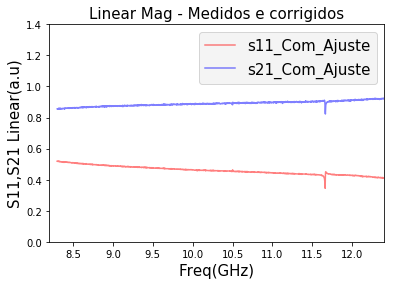

In [8]:
#Plot S11 e S21 Linear Mag

#fig=plt.figure(num=1,figsize=(x,y))

#plt.title("Linear Mag: Ajuste x sem Ajuste")
plt.title("Linear Mag - Medidos e corrigidos",fontsize = fonte)

plt.plot(F_grafic,S11_mod_c,'r-',label ="s11_Com_Ajuste",alpha=0.5,markevery=skip_point)
plt.plot(F_grafic,S21_mod_c,'b-',label="s21_Com_Ajuste",alpha=0.5,markevery=skip_point)

#plt.plot(F_grafic,S11_mod,'r-', linewidth=2,label ="s11_Sem_Ajuste")
#plt.plot(F_grafic,S21_mod,'b-', linewidth=2,label="s21_Sem_Ajuste")

plt.xlim(8.2,12.4)
plt.ylim(0,1.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("S11,S21 Linear(a.u)",fontsize = fonte)

#plt.legend(loc ='center right').get_frame().set_facecolor('0.95')
plt.legend(loc =1,fontsize = fonte).get_frame().set_facecolor('0.95')

#plt.savefig(u'Grafico_1.jpg')
plt.show()

In [9]:
#----------------------VETORE-parte 2---------------------

s11_ph =[] #EXP Fase CORRIGIDA
s21_ph =[] #EXP Fase CORRIGIDA

s11_db =[] #S11 EXP em dB CORRIGIDO
s21_db =[] #S21 EXP em dB CORRIGIDO

sum = [] # somatório -> sum = |s11|**2 + |s21|**2
A =[] #Absorbance
R = [] #Reflectance
TRANS = [] #Transmitance

# Rotina de Cálculo - parte 1:

* <strong>dB em POTÊNCIA</strong>

$S_{11} = 10log_{10}(S11_{ok})$

$S_{21} = 10log_{10}(S21_{ok})$


* <strong>dB em VOLTAGEM</strong>

$S_{11} = 20log_{10}(S11_{ok})$

$S_{21} = 20log_{10}(S21_{ok})$

<font color = 'green'>OBS $V=RI$ and $P = IV$, then: $P \alpha V^{2}$ ... db = 10log_{10}(x)</font>

<br/>
<br/>
<br/>

* <strong>Fase (rad)</strong>

$S11_{ph} = arctan(\frac{jS_{11}}{S_{11}})$ 

$S21_{ph} = arctan(\frac{jS_{21}}{S_{21}})$ 


<br/>
<br/>
<br/>


### Formula da Reflectância, Transmitância e Absorbância para medida em duas (porta 1 e 2 sem placa)

* <strong>Reflectância (Coeficiente de Reflexão)</strong>

$reflectance = |S_{11}|^{2}$


<br/>
<br/>
<br/>

   
* <strong>Transmitância (Coeficiente de Transmissão)</strong>

$transmitance = |S_{21}|^{2}$


<br/>
<br/>
<br/>

* <strong>Absorbância</strong>

$absorbance = 1 - reflectance - absorbance $

<br/>
<br/>
<br/>

*<strong>Portanto, podemos dizer que:</strong>

$1 = |S_{11}|^{2} + |S_{11}|^{2} + Absorbância$




In [10]:

for n in range(0,len(F)):


    #------------------- dB EXP--------------
    #Transformar S11  S21 para dB
    s11_db_calc = 20*np.log10(abs(s11c[n]))
    s21_db_calc = 20*np.log10(abs(s21c[n]))

    #add no vetor DB
    s11_db.append(s11_db_calc)
    s21_db.append(s21_db_calc)
    #--------------------------------------------

    

    #----------------FASE EXP--------------------
    #Calcular fase em radianos (conta basica de vetor)

    #Essa Funcao é usada em números reais imaginários contínuos...
    s11_ph_calc = np.arctan2(s11c[n].imag,s11c[n].real) # Para numeros complexos usar a sintaxe np.tan2(imag,real)
    s21_ph_calc = np.arctan2(s21c[n].imag,s21c[n].real) # Para numeros complexos usar a sintaxe np.tan2(imag,real)

    # Essa funcao é usada para numeros REAIS (ISOLADAS) 
    # s11_ph_calc = np.arctan(s11c[n].imag/s11c[n].real) 
    #s21_ph_calc = np.arctan(s21c[n].imag/s21c[n].real)

    #Converter rad para graus
    s11_ph_calc_grau = 360.0*s11_ph_calc/(2.0*np.pi) 
    s21_ph_calc_grau = 360.0*s21_ph_calc/(2.0*np.pi) 

    #add no vetor da phase
    s11_ph.append(s11_ph_calc_grau)
    s21_ph.append(s21_ph_calc_grau)
    #-----------------------------------------


    #------- ABSORBANCE =1 - TRANSMITANCE - REFLECTANCE-----
    reflectance = abs(s11c[n])**2
    transmitance = abs(s21c[n])**2
    absorvance = 1.0 - reflectance - transmitance

    #add vetor A,TRANS and R
    A.append(absorvance)
    TRANS.append(transmitance)
    R.append(reflectance)
    #-----------------------------------------------------------


    #--------------SUM-----------------------------------------
    #Isso mostra as perdas
    soma = reflectance + transmitance  #+ absorvance #resultado soma = 1 

    #add vetor sum
    sum.append(soma)
    #----------------------------------------------------------

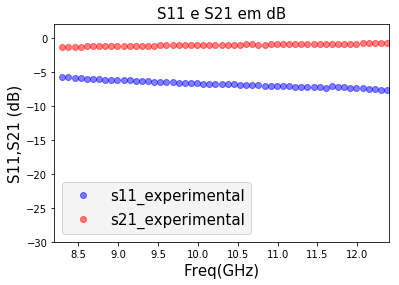

In [11]:
#Plot Modulo em DB
#fig=plt.figure(num=1,figsize=(x,y))

plt.plot(F_grafic,s11_db,'ob',label ='s11_experimental',alpha=0.5,markevery=skip_point)
plt.plot(F_grafic,s21_db,"or",label = 's21_experimental',alpha=0.5,markevery=skip_point)

plt.ylim(-30,2)
plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("S11,S21 (dB)",fontsize = fonte)
plt.title("S11 e S21 em dB",fontsize = fonte)
#plt.legend().get_frame().set_facecolor('0.95')
#"upper left"
plt.legend(loc ='best',fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_2.jpg')
plt.show()


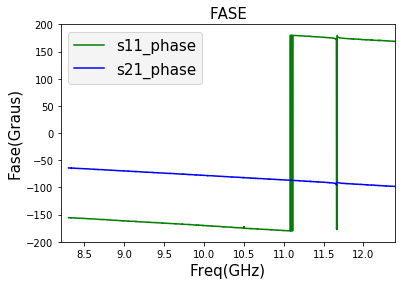

In [12]:
#Plot Phase em Grau
#fig=plt.figure(num=1,figsize=(x,y))

plt.plot(F_grafic,s11_ph,'g-',label ='s11_phase')
plt.plot(F_grafic,s21_ph,'b-',label='s21_phase')

#plt.plot(F_grafic,s11_ph_t,'c-', linewidth=2,label ="s11_Phase_Teorico")
#plt.plot(F_grafic,s21_ph_t,'r-', linewidth=2,label="s21_Phase_Teorico")

plt.xlim(8.2,12.4)
plt.ylim(-200,200)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("Fase(Graus)",fontsize = fonte)
plt.legend(loc='best',fontsize = fonte).get_frame().set_facecolor('0.95')
plt.title("FASE",fontsize = fonte)
#plt.savefig(u'Grafico_3.jpg')
plt.show()


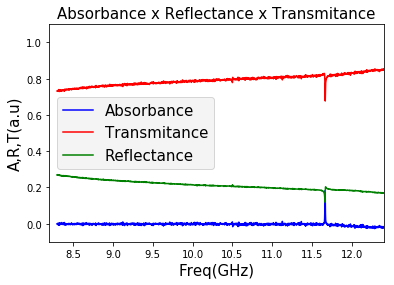

In [13]:
#Plot aborbance, refletance and transmitance
#fig=plt.figure(num=1,figsize=(x,y))

plt.plot(F_grafic,A,'-b',label ='Absorbance')
plt.plot(F_grafic,TRANS,'-r',label ='Transmitance')
plt.plot(F_grafic,R,'-g',label ='Reflectance')
plt.ylim(-0.1,1.1)
plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("A,R,T(a.u)",fontsize = fonte)
plt.title("Absorbance x Reflectance x Transmitance",fontsize = fonte)
#plt.title("Absorbance, Reflectance and Transmitance")
plt.legend(loc='best',fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_4.jpg')
plt.show()


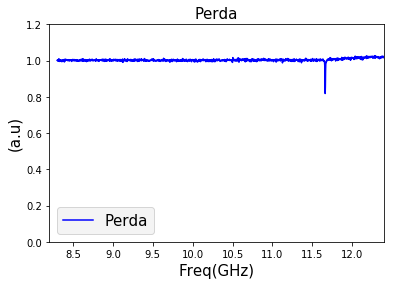

In [14]:
#Plot Sum
#fig=plt.figure(num=1,figsize=(x,y))
#plt.plot(F_grafic,sum,'-b',label ='SOMA DE S11 e S21')
plt.plot(F_grafic,sum,'-b',label ='Perda')
plt.ylim(0,1.2)
plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("(a.u)",fontsize = fonte)
plt.title("Perda", fontsize = fonte)
plt.legend(fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_5.jpg')
plt.show()

In [15]:
#-----------Vetores - parte 3------------------------

T =[] #coeficiente de transmissao dos Par-S

R =[] #coeficiente de reflexao dos Par-S

Cvetor =[] #coeficiente de reflexao dos Par-S

Z_nrw = []
#----------Cálculo de e and u ----------------------

er_r = [] #permissividade real
er_i = [] #'''''''''''''' imag
ur_r = [] #permeabilidade real
ur_i = [] #'''''''''''''' imag

er_abs=[] #permissividade modulo
ur_abs=[] #permeabilidade modulo


In [16]:
#VETOR - parte 3

#---------------------Método 1- Zin -------------------------------
Zin =[] #Zin Teorico com CURTO

R_Zin =[] #Coeficiente de Reflexao com CURTO TEORICO

#---------------------Método 2 - NIST NRW -------------------------

S11_r=[]

In [17]:
#Parâmetros do Guia
dL = 0e-3
L = d
L1  = offset - d -dL




# Rotina de Cálculo - parte 2: Aplicar o NRW


<br/>
<br/>
<br/>

* <strong>Coeficiente de Reflexão</strong>

<font size = 3>

$V_{1} = S_{21} + S_{11}$

$V_{2} = S_{21} - S_{11}$

$X = \frac{1 - V_{1}V_{2}}{V_{1} - V_{2}}$

$\Gamma = X \pm \sqrt{X^{2}-1}$

</font>


<br/>
<br/>
<br/>

* <strong>Coeficiente de Transmissão</strong>

<font size = 5>
$T = \frac{S_{11} + S_{21} - \Gamma}{1 - (S_{11} + S_{21})\Gamma}$
</font>

<br/>
<br/>
<br/>


* <strong>Permeabilidade real e imaginária</strong>

<font size = 5>
$\mu_{r} = \frac{1+\Gamma}{(1-\Gamma)\Lambda\sqrt{\frac{1}{\lambda_{o}^{2}} - \frac{1}{\lambda_{c}^{2}}}}$

onde:

$\frac{1}{\Lambda^{2}} = - [\frac{1}{2\pi L}ln({\frac{1}{T}})]^{2}$
</font>


<br/>
<br/>
<br/>

* <strong>Permissividade real e imaginária</strong>

<font size = 5>
$\varepsilon_{r} = \frac{\lambda^{2}}{\mu_{r}}[\frac{1}{\lambda^{2}_{c}} - [\frac{1}{2\pi L}ln(\frac{1}{T})]^{2}]$


</font>

# Rotina de Cálculo - parte 3: S11 com placa Metálica 

Utilizar o $\epsilon$ e $\mu$ calculados do método NRW para calcular S11 com placa

<img src = './img/vna_curto.png' width = 600 >


## Método 1 - Refletividade com Placa (Zin) 

#### (Fonte: artigos)

<br/>
<br/>
<br/>


<font color = red>

OBS: MEDIDAS COM PLACA ATRÁS, $S11 = \Gamma$
OBS: NÃO CONFUNDIR AS MEDIDAS DE PLACA ATRÁS E ABERTO... (ABERTO) $S11 = |\Gamma^{2}|$ (CURTO) $S11 = \Gamma$

<font size = 5>

$Z_{in} = Z_{o}\sqrt{\frac{\mu}{\epsilon}}tanh(\frac{2j\pi d}{\lambda}\sqrt{\mu \epsilon})$

ou

$Z_{in} = Z_{o}j\sqrt{\frac{\mu}{\epsilon}}tan(\frac{2\pi d}{\lambda}\sqrt{\mu \epsilon})$

$S11 = \Gamma = \frac{Z_{in}-Z_{o}}{Z_{in}+Z_{o}}$

</font>

</font>

<font color = green>

USAREMOS: NORMALIZAR COM A IMPEDÂNCIA DO GUIA $Z_{o} = 50 \Omega$
OBS: free space $Z_{o} = 377 \Omega$ 

<font size = 5>

$Z_{in} = \sqrt{\frac{\mu}{\epsilon}}tanh(\frac{2j\pi d}{\lambda}\sqrt{\mu \epsilon})$

$S11 = \Gamma = \frac{Z_{in}-1}{Z_{in}+1}$

</font>

</font>

## Método 2 - Refletividade com Placa 

#### (fonte: livro NIST - NRW, capítulo 3)

<br/>
<br/>
<br/>


* <strong>Constante de Propagação no Vácuo</strong>

<font size = 5 >$\gamma_{o}  = 2j\pi \sqrt{\frac{1}{\lambda^{2}}- \frac{1}{\lambda^{2}_{c}}}$ </font>



<br/>
<br/>
<br/>


* <strong>Constante de Propagação no Material</strong>

<font size = 7 >$\gamma  = 2j\pi \sqrt{\epsilon \mu- \frac{\lambda^{2}}{\lambda^{2}_{c}}}$</font>



<br/>
<br/>
<br/>

<font color = blue>
* <strong>Constante de Propagação da onda (APÊNDICE)</strong>

$\gamma  = \alpha + j \beta$

$\alpha$ = 0 = constante de atenuação

$\beta = constante de Fase$
</font>


<br/>
<br/>
<br/>


* <strong>Constante de Fase</strong>

<font size = 6>$\beta = \frac{\gamma_{o}}{\gamma \mu}$</font>



<br/>
<br/>
<br/>


   
* <strong>Parâmetro S11 - (Bruto)</strong>

<font size = 6>
$S11 = \frac{tanh(\gamma L) + \beta tanh(\gamma_{o} \Delta L ) - \beta (1+\beta tanh(\gamma L) tanh(\gamma_{o} \Delta L))}{tanh(\gamma L) + \beta tanh(\gamma_{o} \Delta L ) + \beta (1+\beta tanh(\gamma L) tanh(\gamma_{o} \Delta L))}$
</font>
 
<br/>
<br/>
<br/>



* <strong>Coeficiente para Ajustar os Planos de Referência da porta 1</strong>

<font size = 6>
$R_{1} = e^{\gamma L1}$
</font>

<br/>
<br/>
<br/>

* <strong>Ajustar S11</strong>

<font size = 6>
$S11_{ok} = R_{1}R_{1}S11$
</font>


<br/>
<br/>
<br/>


In [18]:
"""
Calcular:

-Coeficiente de Transmissão
-Coeficiente de Reflexão
-Permissividade real e imaginária
-Permeabilidade real e imaginária
"""
for n in range(0,len(F)):
    
    #frequencia
    f = F[n]

    #lambda zero = comprimento de onda no vacuo
    onda = c/(f) # [m]

   

    # --------------Cálculo do coeficiente de REFLEXÃO-----------
    #Valor V1, V2, X
    V1 = s21c[n] + s11c[n]
    V2 = s21c[n] - s11c[n]
    X = (1-V1*V2)/(V1-V2)
    #X = ((s11c[n])**(2.0)-(s21c[n])**(2.0)+1)/(2*s11c[n]) 

    #Coeficiente de reflexao Par-S
    #positivo
    r_p = X + np.sqrt(X**2-1)
    #negativo
    r_n = X - np.sqrt(X**2-1)
    #condicao para valor do sinal do coeficiente de reflexao
    if r_p < 1:
        sinal = 1
    elif r_n <= 1:
        sinal =-1
    #coeficiente de reflexao com sinal ok
    r = X+sinal*(np.sqrt(X**2-1))

    R.append(abs(r))
    #----------------------------------------------------------
    
    
    # -----------------Cálculo do Coeficiente de TRANSMISSÃO ------
    #Método 1 - Livro NIST
    t = (s11c[n] + s21c[n] - r)/(1 -(s11c[n] + s21c[n])*r)
    
    T.append(abs(t))
    
    """# Método 2 - Barroso Programa
    
    #Constante de propagacao da onda no espaco livre
    gama0 = (2j*np.pi)*np.sqrt((1.0)/(onda**(2.0))-(1.0)/(onda_cut**(2.0)))

    #impedancia do material calculada  com par-S (zm)  #IGUAL DO NRW
    z_m = np.sqrt(((1+s11c[n])**(2)-s21c[n]**2)/((1-s11c[n])**(2)-s21c[n]**(2)))

    #coeficiente de transmissao Calculado 
    t = s21c[n]/(1-s11c[n]*((z_m-1)/(z_m+1)))

    T.append(abs(t))"""
    #----------------------------------------------------------------
    

    #constante P
    P2=-((1.0)/(2*np.pi*d)*np.log(1.0/t))**2
    P=1.0/np.sqrt(P2)


    #constante Lamb
    lamb = np.sqrt((1.0)/(onda)**(2)-(1.0)/(onda_cut)**(2))

    #impedancia NRW (z_nrw) #IGUAL AO Z CALCULADO COM PAR-S (z_m)
    z_nrw = (1+r)/(1-r)
    Z_nrw.append(z_nrw.real) #somente real


    #Permeabilidade NRW
    ux = z_nrw/(P*lamb)
    

    ur_r.append(ux.real)
    ur_i.append(ux.imag)
    ur_abs.append(abs(ux))


    #Permissividade NRW
    ex = ((onda)**(2)/ux)*((1.0)/(onda_cut)**2-((1)/(2*np.pi*d)*np.log(1.0/t))**2)
    #ex = ex.real - 1j*ex.imag


    er_r.append(ex.real)
    #er_i.append(ex.imag)
    er_i.append(-1*ex.imag) # Fiz isso para ficar certo, ficar positivo no gráfico...
    er_abs.append(abs(ex))
    
    
    
    
    
    # -------------- SIMULAR S11 + SHORT-CORT ------------------ 

    # Método 1 -> Zin - Refletividade (S11+CURTO)

    
    #Zin e Refletividade (S11 + curto)
    zin = (ux/ex)**(1.0/2.0)*np.tanh((2j*np.pi*d/onda)*((ux*ex)**(1.0/2.0)))
    
    #Coeficiente de Reflexao com curto
    C_curto = (zin-1)/(zin+1)
    
    #db = -20*np.log10(abs(C_curto)) #Em dB (tem o menos na frente pois o e.imaginário é positivo)
    #R_Zin.append(db)
    
    R_Zin.append(abs(C_curto)) #LINEAR MAG

    #-----------------------------------------------------
    
    #Método 2 -> Livro do NIST

    #Constante de propagacao da onda no espaco livre
    gama0 = (2j*np.pi)*np.sqrt((1.0)/(onda**(2.0))-(1.0)/(onda_cut**(2.0)))
    #Constante de Propagação da onda no Material
    gamax = (2j*np.pi/onda)*np.sqrt(ex*ux-(onda**2.0)/(onda_cut**2.0))
    #Constante de Atenuação
    B = gama0/(gamax*ux)
    #Par - S11 bruto
    s11_r = (np.tanh(gamax*L)+B*np.tanh(gama0*dL)-B*(1+B*np.tanh(gamax*L)*np.tanh(gama0*dL)))/(np.tanh(gamax*L)+B*np.tanh(gama0*dL)+B*(1+B*np.tanh(gamax*L)*np.tanh(gama0*dL)))
    #Coeficiente de ajuste de plano da porta 1
    R1 = np.exp(-gama0*L1)
    # coeficiente de ajuste
    s11_r_colocar = R1*R1*s11_r
    # Parâmetro S11 
    S11_r.append(abs(s11_r_colocar))
    
    

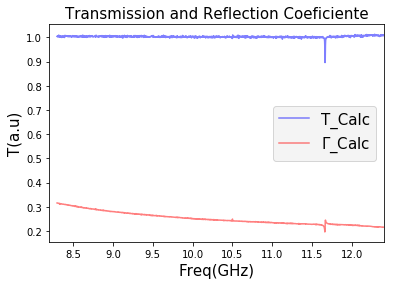

In [19]:
#Plot Coeficiente de Transmissao e Reflexão
#fig=plt.figure(num=1,figsize=(x,y))

plt.plot(F_grafic,T,'b-',label ='T_Calc',alpha=0.5,markevery=skip_point)
plt.plot(F_grafic,R,'r-',label ='$\Gamma$_Calc',alpha=0.5,markevery=skip_point)

plt.xlim(8.2,12.4)
#plt.ylim(0,1.2)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("T(a.u)",fontsize = fonte)
plt.title("Transmission and Reflection Coeficiente", fontsize = fonte)
plt.legend(fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_8.jpg')
plt.show()


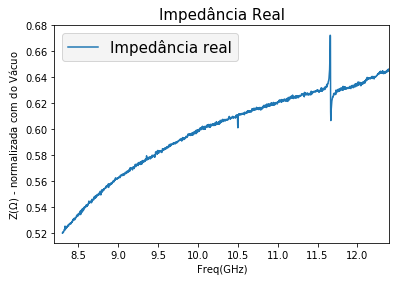

In [20]:
#plot Impedância Real
#fig=plt.figure(num=1,figsize=(x,y))
plt.plot(F_grafic,Z_nrw,'-',label="Impedância real")
plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)")
plt.title("Impedância Real",fontsize = fonte)
plt.ylabel("Z($\Omega$) - normalizada com do Vácuo")
plt.legend(fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_1x.jpg')
plt.show()

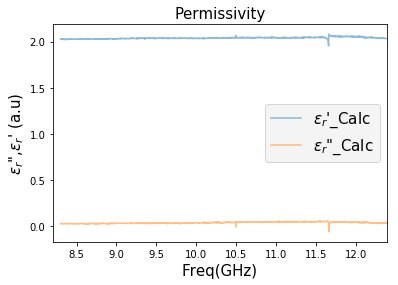

In [21]:
#plot e
#fig=plt.figure(num=1,figsize=(x,y))

plt.plot(F_grafic,er_r,'-',label="$\epsilon_{r}$'_Calc",alpha=0.5,markevery=skip_point)
plt.plot(F_grafic,er_i,'-',label='$\epsilon_{r}$"_Calc',alpha=0.5,markevery=skip_point)
plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel('$\epsilon_{r}$"'+",$\epsilon_{r}$' (a.u)",fontsize = fonte)
plt.title("Permissivity",fontsize = fonte)
plt.legend(loc='best',fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_10.jpg')
plt.show()

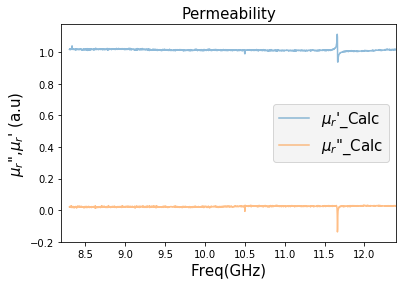

In [22]:
#plot u
#fig=plt.figure(num=1,figsize=(x,y))

plt.plot(F_grafic,ur_r,'-',label = "$\mu_{r}$'_Calc",alpha=0.5,markevery=skip_point )
plt.plot(F_grafic,ur_i,'-',label ='$\mu_{r}$"_Calc',alpha=0.5,markevery=skip_point)
plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel('$\mu_{r}$"'+",$\mu_{r}$' (a.u)",fontsize = fonte)
plt.title("Permeability",fontsize = fonte)
plt.legend(loc='best',fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_11.jpg')
plt.show()

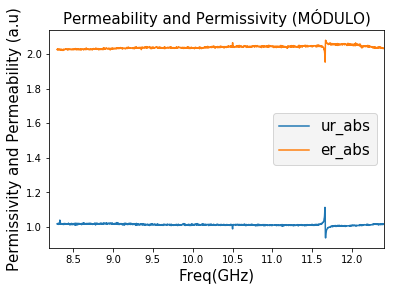

In [23]:

#plot e and u modulo
#fig=plt.figure(num=1,figsize=(x,y))
plt.plot(F_grafic,ur_abs,'-',label="ur_abs")
plt.plot(F_grafic,er_abs,'-',label='er_abs')
plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("Permissivity and Permeability (a.u)",fontsize = fonte)
plt.title("Permeability and Permissivity (MÓDULO)",fontsize = fonte)
plt.legend(fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_12.jpg')
plt.show()

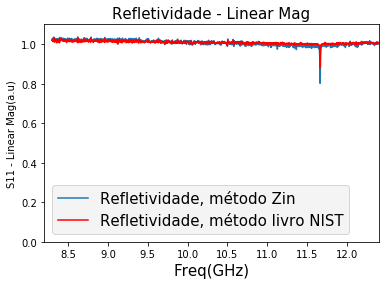

In [28]:
#plot refletividade Analítica

#fig=plt.figure(num=1,figsize=(x,y))
plt.plot(F_grafic,R_Zin,'-',label="Refletividade, método Zin")
plt.plot(F_grafic,S11_r,'r-',label="Refletividade, método livro NIST")

plt.xlim(8.2,12.4)
plt.xlabel("Freq(GHz)",fontsize = fonte)
plt.ylabel("S11 - Linear Mag(a.u)")
plt.title("Refletividade - Linear Mag",fontsize = fonte)
plt.legend(fontsize = fonte).get_frame().set_facecolor('0.95')
#plt.savefig(u'Grafico_12.jpg')
plt.ylim(0,1.1)
plt.show()

In [25]:

# Voltar a Raiz
os.chdir(local)
os.chdir("./output_data")

#---------------------Gravar Dados TXT---------------------

arqnew= open("./"+TXT[0][:-4]+"_e_u.txt",'w')

arqnew.write("%8s,%4s,%4s,%4s,%4s\n"%('Fre(Hz)','er','ei','ur','ui'))

for n in range(0,len(F)):

    escrever = "%.4f,%.4f,%.4f,%.4f,%.4f\n"%(F[n],er_r[n],er_i[n],ur_r[n],ur_i[n])
    #escrever = "%.4f\n"%(F[n])

    arqnew.write(escrever)



arqnew.close()
